## Univariate Bar Graph for Categorical Variables

In [3]:
# import the essentioal modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [11]:
# Extract the data
pokemon = pd.read_csv('../../Datasets/pokemon.csv', index_col='id')

print(pokemon.shape)

print(pokemon.head())

(807, 13)
       species  generation_id  height  weight  base_experience type_1  type_2  \
id                                                                              
1    bulbasaur              1     0.7     6.9               64  grass  poison   
2      ivysaur              1     1.0    13.0              142  grass  poison   
3     venusaur              1     2.0   100.0              236  grass  poison   
4   charmander              1     0.6     8.5               62   fire     NaN   
5   charmeleon              1     1.1    19.0              142   fire     NaN   

    hp  attack  defense  speed  special-attack  special-defense  
id                                                               
1   45      49       49     45              65               65  
2   60      62       63     60              80               80  
3   80      82       83     80             100              100  
4   39      52       43     65              60               50  
5   58      64       58   

In [35]:
# set the color palette(default palette is giving different colors for each bar)
base_color = sb.color_palette()[9]

In [42]:
# sort the graph in descending order of frequency count
sorted_indices = pokemon.generation_id.value_counts().index

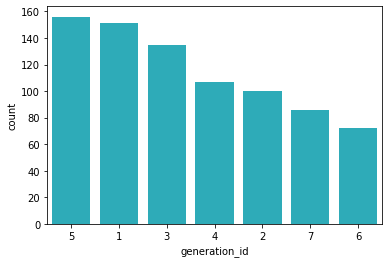

In [43]:
# Make a Bar Graph with seaborn
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=sorted_indices)

In [45]:
sorted_indices = pokemon.type_1.value_counts().index

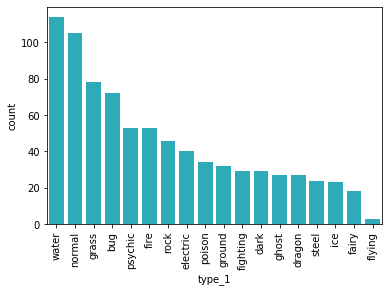

In [51]:
sb.countplot(data=pokemon, x='type_1', order=sorted_indices, color=base_color);
plt.xticks(rotation=90);

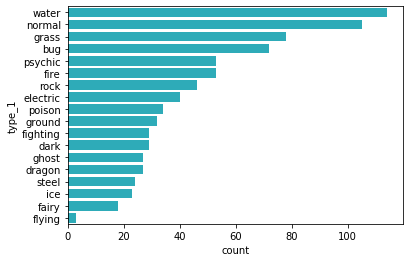

In [54]:
# horizontal barGraph
sb.countplot(data=pokemon, y='type_1', color=base_color, order=sorted_indices);

**Absolute VS Relative Frequency in Bar Graph**

**Absolute Frequency:** Shown in above Graphs

**Relative Frequency:** Shown in Graphs Below

In [61]:
# Extract the data
pokemon = pd.read_csv('../../Datasets/pokemon.csv')

print(pokemon.shape)

print(pokemon.head())

(807, 14)
   id     species  generation_id  height  weight  base_experience type_1  \
0   1   bulbasaur              1     0.7     6.9               64  grass   
1   2     ivysaur              1     1.0    13.0              142  grass   
2   3    venusaur              1     2.0   100.0              236  grass   
3   4  charmander              1     0.6     8.5               62   fire   
4   5  charmeleon              1     1.1    19.0              142   fire   

   type_2  hp  attack  defense  speed  special-attack  special-defense  
0  poison  45      49       49     45              65               65  
1  poison  60      62       63     60              80               80  
2  poison  80      82       83     80             100              100  
3     NaN  39      52       43     65              60               50  
4     NaN  58      64       58     80              80               65  


In [71]:
# Melt the two columns type_1 and type_2 into one
pkmn_types = pokemon.melt(id_vars=['species','id','generation_id'], value_vars=['type_1', 'type_2'], var_name='type_level', value_name='type').dropna()

pkmn_types[802:812]

,species,id,generation_id,type_level,type
802,poipole,803,7,type_1,poison
803,naganadel,804,7,type_1,poison
804,stakataka,805,7,type_1,rock
805,blacephalon,806,7,type_1,fire
806,zeraora,807,7,type_1,electric
807,bulbasaur,1,1,type_2,poison
808,ivysaur,2,1,type_2,poison
809,venusaur,3,1,type_2,poison
812,charizard,6,1,type_2,flying
818,butterfree,12,1,type_2,flying


In [129]:
# set the color palette(default palette is giving different colors for each bar)
base_color = sb.color_palette()[0]

# sort the graph in descending order of frequency count
type_counts = pkmn_types.type.value_counts()
type_index = type_counts.index

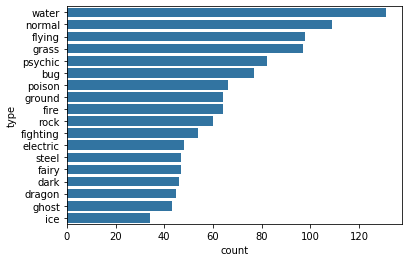

In [130]:
# plot the graph
sb.countplot(data=pkmn_types, order=type_index, color=base_color, y='type')

In [92]:
# finding the max tick value
n_pokemon = pokemon.shape[0]  # 807
max_type_count = type_counts[0]  # 131
max_prop = max_type_count / n_pokemon  # 0.16
max_prop

0.1623296158612144

In [131]:
ticks_prop = np.arange(0, max_prop, 0.02)  # [0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16]
tick_names = [str(n) for n in ticks_prop]  # ['0.0', '0.02', '0.04', '0.06', '0.08', '0.1', '0.12', '0.14', '0.16']

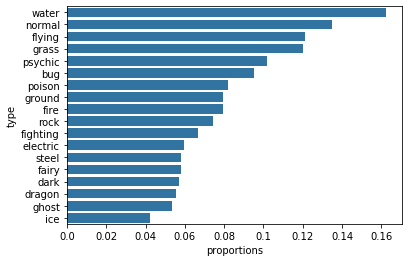

In [132]:
# plot the graph
sb.countplot(data=pkmn_types, order=type_index, color=base_color, y='type')
plt.xticks(ticks_prop * n_pokemon, tick_names);
plt.xlabel('proportions');

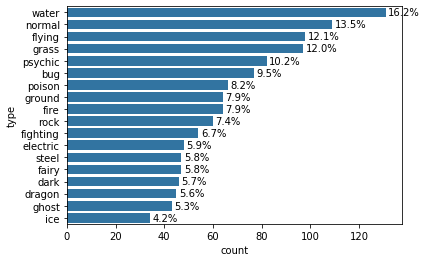

In [133]:
sb.countplot(data=pkmn_types, order=type_index, color=base_color, y='type');
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = f"{round(100*count/n_pokemon, 1)}%"
    plt.text(count+1, i, pct_string, va='center');